This notebook demonstrates some sample results of the CelebA smile classifier on the FFHQ dataset.

In [1]:
import matplotlib.pyplot as plt
import os

from PIL import Image
import numpy as np

from src.classification.smile_classifier import SmileClassifier

In [16]:
# Configuration
PRETRAINED_CLASSIFIER_PATH = "../models/classifier/celeba_smile/predictor_128.pth.tar"
SCALED_CLASSIFIER_PATH = "../models/classifier/celeba_smile/predictor_128_scaled3.pth.tar"
ATTR_FILE = "../models/classifier/celeba_smile/attributes.json"
IMAGE_PATH = "../data/ffhq/images1024x1024/"

In [17]:
# Create classifier
smile_classifier = SmileClassifier(PRETRAINED_CLASSIFIER_PATH, ATTR_FILE, device="cpu")

# Scaled classifier
smile_classifier_scaled = SmileClassifier(PRETRAINED_CLASSIFIER_PATH, ATTR_FILE, SCALED_CLASSIFIER_PATH, device="cpu")

Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth
Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth


Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1


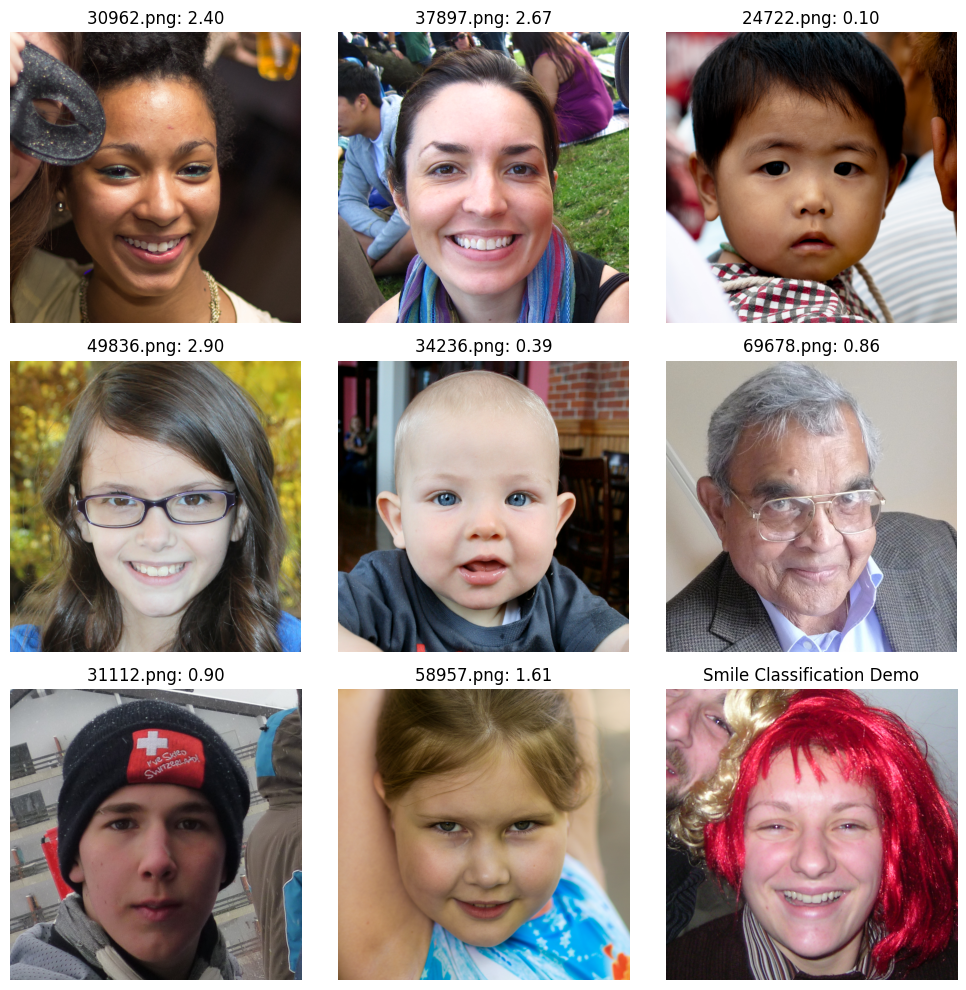

In [10]:
# Demo: Classify 9 random images and plot them in a 3x3 grid with their smile score
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        image_path = np.random.choice(os.listdir(IMAGE_PATH))
        smile_score = smile_classifier.classify(IMAGE_PATH + image_path)
        image = Image.open(IMAGE_PATH + image_path)
        axs[i, j].imshow(image)
        axs[i, j].set_title(f"{image_path}: {smile_score:.2f}")
        axs[i, j].axis("off")

plt.title("Smile Classification Demo")
plt.tight_layout()
plt.show()

Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1
Processing batch 1/1


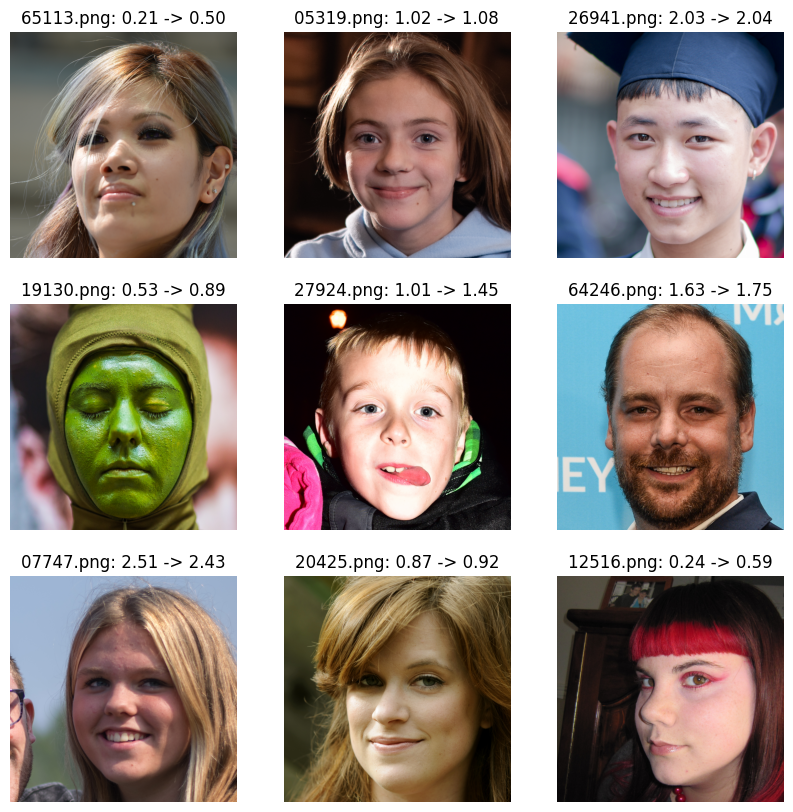

In [19]:
# Demo:
# - pick 9 random images and classify them in one batch, for both the original and the scaled classifier

# Original classifier (test classifying single images)
smile_scores = []
image_paths = []
for i in range(9):
    image_path = np.random.choice(os.listdir(IMAGE_PATH))
    smile_scores.append(smile_classifier.classify(IMAGE_PATH + image_path))
    image_paths.append(image_path)

# Scaled classifier (test classifying in batch)
smile_scores_scaled = smile_classifier_scaled.classify([IMAGE_PATH + image_path for image_path in image_paths])

# Plot
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        image = Image.open(IMAGE_PATH + image_paths[i * 3 + j])
        axs[i, j].imshow(image)
        axs[i, j].set_title(f"{image_paths[i * 3 + j]}: {smile_scores[i * 3 + j]:.2f} -> {smile_scores_scaled[i * 3 + j]:.2f}")
        axs[i, j].axis("off")